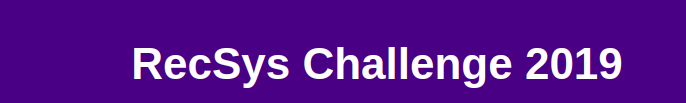

In [1]:
import pandas as pd 
import numpy as np 

# Get data from https://recsys.trivago.cloud/challenge/dataset/

In [3]:
df = pd.read_csv('../data/Rectrain.csv', nrows=20)
df.head(20)

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
0,00RL8Z82B2Z1,aff3928535f48,1541037460,1,search for poi,Newtown,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
1,00RL8Z82B2Z1,aff3928535f48,1541037522,2,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
2,00RL8Z82B2Z1,aff3928535f48,1541037522,3,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
3,00RL8Z82B2Z1,aff3928535f48,1541037532,4,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
4,00RL8Z82B2Z1,aff3928535f48,1541037532,5,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
5,00RL8Z82B2Z1,aff3928535f48,1541037532,6,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
6,00RL8Z82B2Z1,aff3928535f48,1541037532,7,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
7,00RL8Z82B2Z1,aff3928535f48,1541037532,8,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
8,00RL8Z82B2Z1,aff3928535f48,1541037542,9,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
9,00RL8Z82B2Z1,aff3928535f48,1541037542,10,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN


In [191]:
df.shape 

(15932992, 12)

### Number of all session id in dataset

In [192]:
all_session_ids = df.session_id.unique()
all_session_ids

array(['aff3928535f48', 'fa3a53156ae5c', '3599a6f709eab', ...,
       'e7916050980d9', '061152606ba18', '62728015bec05'], dtype=object)

In [193]:
num_of_session = len(all_session_ids)
num_of_session

910683

#### Check dupliactes

In [194]:
first_step_session = (df[df.step==1].session_id)

In [195]:
first_index_ses = np.array(first_step_session.index)

In [196]:
first_id_session = np.array(first_step_session)

In [197]:
first_id_session

array(['aff3928535f48', 'fa3a53156ae5c', '3599a6f709eab', ...,
       'e7916050980d9', '061152606ba18', '62728015bec05'], dtype=object)

In [198]:
len(np.unique(first_id_session))

910683

In [199]:
len(np.array(first_id_session))

910732

In [200]:
dupli = len(df[(df.session_id.isin(all_session_ids)) & (df.step==1)])
dupli

910732

In [201]:
dupli - num_of_session

49

## Delete duplicates

In [202]:
session_to_drop = pd.Series(first_id_session)

In [203]:
session_to_drop = session_to_drop[session_to_drop.duplicated()]

In [204]:
session_to_drop[:10]

125357    15e8515f6d309
246594    66a0f72202a79
332969    c0c2730fdde6c
334428    c0c2730fdde6c
338887    9b400754ac6c7
358793    2a181b2125efe
366688    7ef3c8ccd4e8c
405703    1b8cc2c510a21
441894    a1d0665614354
469903    c0c2730fdde6c
dtype: object

Check how look duplicates session

In [205]:
df[(df.session_id.isin(session_to_drop)) & (df.step==1)].sort_values("session_id").head(10)

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
5633793,Z318E4ELCZDN,0187dfe7f029a,1541419153,1,clickout item,45648,IT,"Montalcino, Italy",mobile,NaN,45648|949727|1891685|2874926|2001759|122157|28...,889|130|94|125|300|149|159|270|630|247|65|150|...
15798594,Z318E4ELCZDN,0187dfe7f029a,1541194025,1,search for destination,"Siena, Italy",IT,"Siena, Italy",mobile,NaN,NaN,NaN
667120,P09UHBW0J57Z,07093a858ac92,1541183207,1,clickout item,127758,PT,"Ovar, Portugal",mobile,NaN,2066828|7122714|35129|438176|438196|127758|181...,79|41|36|60|111|61|34|49|28|52|48|51|54|64|86|...
11212269,P09UHBW0J57Z,07093a858ac92,1541269173,1,clickout item,127545,PT,"Alcobaça, Portugal",mobile,NaN,127545|2732722|113357|1320531|1166896|157222|4...,71|81|61|71|69|90|95|30|70|53|45|85|64|60|58|1...
9207620,MUII6S3JK1V7,0a058d4e25fc7,1541319754,1,change of sort order,interaction sort button,US,"Antananarivo, Madagascar",mobile,NaN,NaN,NaN
11621859,MUII6S3JK1V7,0a058d4e25fc7,1541269327,1,search for destination,"Antananarivo, Madagascar",US,"Antananarivo, Madagascar",mobile,NaN,NaN,NaN
3821055,2ZCMVVJLUJ0W,0ed0c1aa802bb,1541465782,1,clickout item,3166442,BR,"Garibaldi, Brazil",mobile,NaN,3166442|7821294|4033052|8462082|326836|501956|...,97|32|29|67|91|52|58|29|50|93|39|27|69|42|42|4...
12096073,2ZCMVVJLUJ0W,0ed0c1aa802bb,1541443153,1,clickout item,3166442,BR,"Garibaldi, Brazil",mobile,NaN,3166442|7821294|4033052|8462082|326836|501956|...,98|32|29|67|105|53|64|29|34|94|50|38|28|69|42|...
9826475,KM9M1H6OUC8V,14ffe9351be7c,1541147752,1,clickout item,45072,IT,"Turin, Italy",mobile,NaN,45072|22727|153940|22714|22708|22716|45063|102...,98|88|71|71|89|132|80|125|71|78|98|67|94|138|6...
11073216,KM9M1H6OUC8V,14ffe9351be7c,1541405239,1,clickout item,4212516,IT,"Trequanda, Italy",mobile,NaN,4212516|1258858|5790902|4700838|1534645|384411...,79|250|80|90|50|88|89|300|60|50|75|160|99|85|1...


In [206]:
duplicated_df = df[(df.session_id.isin(session_to_drop))].sort_values(["session_id", "timestamp", "step"])

In [207]:
duplicated_df.head()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
15798594,Z318E4ELCZDN,0187dfe7f029a,1541194025,1,search for destination,"Siena, Italy",IT,"Siena, Italy",mobile,NaN,NaN,NaN
5633793,Z318E4ELCZDN,0187dfe7f029a,1541419153,1,clickout item,45648,IT,"Montalcino, Italy",mobile,NaN,45648|949727|1891685|2874926|2001759|122157|28...,889|130|94|125|300|149|159|270|630|247|65|150|...
667120,P09UHBW0J57Z,07093a858ac92,1541183207,1,clickout item,127758,PT,"Ovar, Portugal",mobile,NaN,2066828|7122714|35129|438176|438196|127758|181...,79|41|36|60|111|61|34|49|28|52|48|51|54|64|86|...
667121,P09UHBW0J57Z,07093a858ac92,1541183361,2,clickout item,438196,PT,"Ovar, Portugal",mobile,NaN,2066828|7122714|35129|438176|438196|127758|181...,79|41|36|60|111|61|34|49|28|52|48|51|54|64|86|...
11212269,P09UHBW0J57Z,07093a858ac92,1541269173,1,clickout item,127545,PT,"Alcobaça, Portugal",mobile,NaN,127545|2732722|113357|1320531|1166896|157222|4...,71|81|61|71|69|90|95|30|70|53|45|85|64|60|58|1...


Add new helper columns to delete duplicates 

In [208]:
duplicated_df["drop"] = np.repeat(True, len(New_df))

In [209]:
def get_index_not_to_drop(steps):
    all_steps = np.array(steps)
    all_indexes = np.array(steps.index)
    indexes = [all_indexes[0]]
    for s, i in zip(all_steps[1:], all_indexes[1:]):
        if s == 1 :
            return indexes 
        else:
            indexes.append(i)
    return indexes

In [210]:
duplicated_df.head()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices,drop
15798594,Z318E4ELCZDN,0187dfe7f029a,1541194025,1,search for destination,"Siena, Italy",IT,"Siena, Italy",mobile,NaN,NaN,NaN,True
5633793,Z318E4ELCZDN,0187dfe7f029a,1541419153,1,clickout item,45648,IT,"Montalcino, Italy",mobile,NaN,45648|949727|1891685|2874926|2001759|122157|28...,889|130|94|125|300|149|159|270|630|247|65|150|...,True
667120,P09UHBW0J57Z,07093a858ac92,1541183207,1,clickout item,127758,PT,"Ovar, Portugal",mobile,NaN,2066828|7122714|35129|438176|438196|127758|181...,79|41|36|60|111|61|34|49|28|52|48|51|54|64|86|...,True
667121,P09UHBW0J57Z,07093a858ac92,1541183361,2,clickout item,438196,PT,"Ovar, Portugal",mobile,NaN,2066828|7122714|35129|438176|438196|127758|181...,79|41|36|60|111|61|34|49|28|52|48|51|54|64|86|...,True
11212269,P09UHBW0J57Z,07093a858ac92,1541269173,1,clickout item,127545,PT,"Alcobaça, Portugal",mobile,NaN,127545|2732722|113357|1320531|1166896|157222|4...,71|81|61|71|69|90|95|30|70|53|45|85|64|60|58|1...,True


In [211]:
def change_column_drop(group):
    steps = group.step
    index = get_index(steps)
    group.loc[group.index.isin(index), 'drop'] = False
    return group

In [212]:
duplicated_df = duplicated_df.groupby(['session_id', 'user_id']).apply(change_column_drop)

In [213]:
duplicated_df.head(10)

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices,drop
15798594,Z318E4ELCZDN,0187dfe7f029a,1541194025,1,search for destination,"Siena, Italy",IT,"Siena, Italy",mobile,NaN,NaN,NaN,False
5633793,Z318E4ELCZDN,0187dfe7f029a,1541419153,1,clickout item,45648,IT,"Montalcino, Italy",mobile,NaN,45648|949727|1891685|2874926|2001759|122157|28...,889|130|94|125|300|149|159|270|630|247|65|150|...,True
667120,P09UHBW0J57Z,07093a858ac92,1541183207,1,clickout item,127758,PT,"Ovar, Portugal",mobile,NaN,2066828|7122714|35129|438176|438196|127758|181...,79|41|36|60|111|61|34|49|28|52|48|51|54|64|86|...,False
667121,P09UHBW0J57Z,07093a858ac92,1541183361,2,clickout item,438196,PT,"Ovar, Portugal",mobile,NaN,2066828|7122714|35129|438176|438196|127758|181...,79|41|36|60|111|61|34|49|28|52|48|51|54|64|86|...,False
11212269,P09UHBW0J57Z,07093a858ac92,1541269173,1,clickout item,127545,PT,"Alcobaça, Portugal",mobile,NaN,127545|2732722|113357|1320531|1166896|157222|4...,71|81|61|71|69|90|95|30|70|53|45|85|64|60|58|1...,True
11212270,P09UHBW0J57Z,07093a858ac92,1541269378,2,interaction item image,2732722,PT,"Alcobaça, Portugal",mobile,NaN,NaN,NaN,True
11212271,P09UHBW0J57Z,07093a858ac92,1541269378,3,interaction item image,2732722,PT,"Alcobaça, Portugal",mobile,NaN,NaN,NaN,True
11212272,P09UHBW0J57Z,07093a858ac92,1541269388,4,interaction item image,2732722,PT,"Alcobaça, Portugal",mobile,NaN,NaN,NaN,True
11212273,P09UHBW0J57Z,07093a858ac92,1541269388,5,interaction item image,2732722,PT,"Alcobaça, Portugal",mobile,NaN,NaN,NaN,True
11212274,P09UHBW0J57Z,07093a858ac92,1541269388,6,interaction item image,2732722,PT,"Alcobaça, Portugal",mobile,NaN,NaN,NaN,True


In [214]:
index_to_drop = duplicated_df[duplicated_df['drop']==True].index

In [215]:
np.array(index_to_drop)

array([ 5633793, 11212269, 11212270, ..., 11307318, 11307319, 11307320])

Change original data frame to data frame without duplicated sessions and get new data frame 

In [216]:
df = df.drop(index_to_drop)

In [217]:
len(new_df)

15931666

In [218]:
df = df.reset_index(drop=True)

In [219]:
df.shape 

(15931666, 12)

In [220]:
df.head()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
0,00RL8Z82B2Z1,aff3928535f48,1541037460,1,search for poi,Newtown,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
1,00RL8Z82B2Z1,aff3928535f48,1541037522,2,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
2,00RL8Z82B2Z1,aff3928535f48,1541037522,3,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
3,00RL8Z82B2Z1,aff3928535f48,1541037532,4,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
4,00RL8Z82B2Z1,aff3928535f48,1541037532,5,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN


### Get stamp and split data train.csv

In [221]:
stamp = 0.8 

In [222]:
num_train_session = int(stamp * num_of_session)
num_train_session

728546

In [223]:
dftrain_end_session_id = all_session_ids[num_train_session]
dftrain_end_session_id

'cae8906db6f21'

In [224]:
df[df.session_id==dftrain_end_session_id].tail()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
12755334,XI4V09UQBBN2,cae8906db6f21,1541491922,25,interaction item image,5740296,TW,"Nantou City, Taiwan",desktop,NaN,NaN,NaN
12755335,XI4V09UQBBN2,cae8906db6f21,1541491925,26,change of sort order,price only,TW,"Nantou City, Taiwan",desktop,NaN,NaN,NaN
12755336,XI4V09UQBBN2,cae8906db6f21,1541491925,27,interaction item image,5740296,TW,"Nantou City, Taiwan",desktop,NaN,NaN,NaN
12755337,XI4V09UQBBN2,cae8906db6f21,1541491925,28,filter selection,Sort by Price,TW,"Nantou City, Taiwan",desktop,Sort by Price,NaN,NaN
12755338,XI4V09UQBBN2,cae8906db6f21,1541491953,29,clickout item,3857806,TW,"Nantou City, Taiwan",desktop,Sort by Price,4182178|3861994|5832464|1908423|5740296|671947...,64|65|74|80|82|84|85|85|85|86|87|87|88|91|91|9...


In [225]:
dftrain_last_index = df[df.session_id==dftrain_end_session_id][-1:].index
dftrain_last_index

Int64Index([12755338], dtype='int64')

In [226]:
dftrain_last_index = int(dftrain_last_index[0])
dftrain_last_index

12755338

### Split dataset to df train and df test

In [227]:
df_train = df[:dftrain_last_index+1]

In [228]:
df_train.shape

(12755339, 12)

In [229]:
df_train.tail()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
12755334,XI4V09UQBBN2,cae8906db6f21,1541491922,25,interaction item image,5740296,TW,"Nantou City, Taiwan",desktop,NaN,NaN,NaN
12755335,XI4V09UQBBN2,cae8906db6f21,1541491925,26,change of sort order,price only,TW,"Nantou City, Taiwan",desktop,NaN,NaN,NaN
12755336,XI4V09UQBBN2,cae8906db6f21,1541491925,27,interaction item image,5740296,TW,"Nantou City, Taiwan",desktop,NaN,NaN,NaN
12755337,XI4V09UQBBN2,cae8906db6f21,1541491925,28,filter selection,Sort by Price,TW,"Nantou City, Taiwan",desktop,Sort by Price,NaN,NaN
12755338,XI4V09UQBBN2,cae8906db6f21,1541491953,29,clickout item,3857806,TW,"Nantou City, Taiwan",desktop,Sort by Price,4182178|3861994|5832464|1908423|5740296|671947...,64|65|74|80|82|84|85|85|85|86|87|87|88|91|91|9...


In [230]:
groundTruth = df[dftrain_last_index+1:]

In [231]:
groundTruth.head(13)

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
12755339,XI9W70AM4A2E,49fbcccb30f40,1541475471,1,search for poi,Ueno Station,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN
12755340,XI9W70AM4A2E,49fbcccb30f40,1541475479,2,interaction item info,1148728,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN
12755341,XI9W70AM4A2E,49fbcccb30f40,1541475635,3,change of sort order,rating and recommended,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN
12755342,XI9W70AM4A2E,49fbcccb30f40,1541475635,4,change of sort order,interaction sort button,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN
12755343,XI9W70AM4A2E,49fbcccb30f40,1541475635,5,change of sort order,interaction sort button,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN
12755344,XI9W70AM4A2E,49fbcccb30f40,1541475635,6,filter selection,Focus on Rating,JP,"Tokyo, Japan",desktop,Focus on Rating,NaN,NaN
12755345,XI9W70AM4A2E,49fbcccb30f40,1541476161,7,interaction item image,103501,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN
12755346,XI9W70AM4A2E,49fbcccb30f40,1541476161,8,interaction item image,103501,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN
12755347,XI9W70AM4A2E,49fbcccb30f40,1541476176,9,clickout item,103501,JP,"Tokyo, Japan",desktop,Focus on Rating,2266812|4675284|321771|3143731|103644|3509932|...,371|100|166|168|250|143|113|121|58|109|265|91|...
12755348,XI9W70AM4A2E,49fbcccb30f40,1541476182,10,interaction item image,103501,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN


## Change data test 
### put nan in reference when is last step and action_type is clickout_item

#### Get index of first step in df test

In [232]:
df_test = groundTruth.copy()

In [233]:
idx_step_1 = np.array(df_test[df_test.step == 1].index)
idx_step_1[:5]

array([12755339, 12755350, 12755351, 12755352, 12755399])

Get last index, but we have to check that the last is also not first  [1: to last] , becasuse first is the first row in data test set, but we want to get step before first step, so we have to get index from [1: ] 

In [234]:
idx_last_step = [x-1 for x in idx_step_1[1:] ]

In [235]:
idx_last_step[:5]

[12755349, 12755350, 12755351, 12755398, 12755401]

In [236]:
df_test[df_test.index.isin(idx_last_step)].head()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
12755349,XI9W70AM4A2E,49fbcccb30f40,1541476182,11,interaction item image,103501,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN
12755350,XJU3EN88E88X,dc52a1e8c459a,1541505439,1,search for destination,"Lonavala, India",IN,"Lonavala, India",mobile,NaN,NaN,NaN
12755351,XK9Q5KDFWUO8,c039590a248a1,1541468709,1,clickout item,6694076,US,"Belek, Turkey",mobile,NaN,6694076|6160412|908005|1256006|37745|1167790|2...,341|190|372|514|268|172|161|325|149|899|254|26...
12755398,XN7BVE3ZYOUQ,59f9c54ef3bb0,1541531104,47,interaction item image,8110264,IN,"Ahmedabad, India",desktop,NaN,NaN,NaN
12755401,XO5V9JATXNZ0,12e45ec9f55a9,1541532176,3,clickout item,935261,IE,"Dún Laoghaire, Ireland",desktop,NaN,935261|46149|148250|640521|12504|46041|46127|4...,155|256|104|112|294|70|128|138|251|112|164|254...


### Change reference to NaN

In [237]:
df_test_label = df_test[(df_test.index.isin(idx_last_step)) & (df_test.action_type == 'clickout item')]['reference']

In [238]:
df_test.loc[(df_test.index.isin(idx_last_step)) & (df_test.action_type == 'clickout item'), 'reference'] = np.nan

In [239]:
df_test[df_test.action_type=='clickout item'].head()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
12755347,XI9W70AM4A2E,49fbcccb30f40,1541476176,9,clickout item,103501,JP,"Tokyo, Japan",desktop,Focus on Rating,2266812|4675284|321771|3143731|103644|3509932|...,371|100|166|168|250|143|113|121|58|109|265|91|...
12755351,XK9Q5KDFWUO8,c039590a248a1,1541468709,1,clickout item,NaN,US,"Belek, Turkey",mobile,NaN,6694076|6160412|908005|1256006|37745|1167790|2...,341|190|372|514|268|172|161|325|149|899|254|26...
12755389,XN7BVE3ZYOUQ,59f9c54ef3bb0,1541530540,38,clickout item,5838026,IN,"Ahmedabad, India",desktop,NaN,5959374|3763928|2660559|5838026|4967826|472502...,46|42|21|27|21|24|50|13|58|22|20|19|20|34|16|1...
12755401,XO5V9JATXNZ0,12e45ec9f55a9,1541532176,3,clickout item,NaN,IE,"Dún Laoghaire, Ireland",desktop,NaN,935261|46149|148250|640521|12504|46041|46127|4...,155|256|104|112|294|70|128|138|251|112|164|254...
12755403,XPXXNDO87ZLO,ecfe498274283,1541517922,2,clickout item,4536970,JP,"Naha, Japan",desktop,NaN,4536970|1751231|1023329|346856|7379644|103471|...,361|324|251|626|664|668|369|325|390|366|388|40...


In [240]:
df_test[df_test.index.isin([14214360,14214361, 14214359, 14214358, 14214362, 14214363, 14214364])]

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
14214358,3RU7SKGY0N51,86f8651ee7e2a,1541087993,240,interaction item image,1929193,IT,"Lisbon, Portugal",mobile,NaN,NaN,NaN
14214359,3RU7SKGY0N51,86f8651ee7e2a,1541088003,241,interaction item image,1929193,IT,"Lisbon, Portugal",mobile,NaN,NaN,NaN
14214360,3RU7SKGY0N51,86f8651ee7e2a,1541088003,242,interaction item image,1929193,IT,"Lisbon, Portugal",mobile,NaN,NaN,NaN
14214361,3RU7SKGY0N51,86f8651ee7e2a,1541088003,243,interaction item image,1852237,IT,"Lisbon, Portugal",mobile,NaN,NaN,NaN
14214362,3RU7SKGY0N51,86f8651ee7e2a,1541088013,244,interaction item image,1852237,IT,"Lisbon, Portugal",mobile,NaN,NaN,NaN
14214363,3RU7SKGY0N51,86f8651ee7e2a,1541088013,245,interaction item image,1852237,IT,"Lisbon, Portugal",mobile,NaN,NaN,NaN
14214364,3RU7SKGY0N51,86f8651ee7e2a,1541088013,246,interaction item image,1852237,IT,"Lisbon, Portugal",mobile,NaN,NaN,NaN


In [241]:
def split_dataset(df, stamp):
    all_session_ids = df.session_id.unique()
    num_of_session = len(all_session_ids)
    num_train_session = int(stamp * num_of_session)
    dftrain_end_session_id = all_session_ids[num_train_session]
    dftrain_last_index = int(df[df.session_id==dftrain_end_session_id][-1:].index[0])
    df_train = df[:dftrain_last_index+1]
    groundTruth = df[dftrain_last_index+1:]
    idx_step_1 = np.array(groundTruth[groundTruth.step == 1].index)
    idx_last_step = [x-1 for x in idx_step_1[1:] ]
    df_test = groundTruth.copy()
    df_test_label = df_test[(df_test.index.isin(idx_last_step)) & (df_test.action_type == 'clickout item')]['reference']
    df_test.loc[(df_test.index.isin(idx_last_step)) & (df_test.action_type == 'clickout item'), 'reference'] = np.nan
    df_train.to_csv('../data/train.csv')
    groundTruth.to_csv('../data/groundTruth.csv')
    df_test.to_csv('../data/test.csv')
    df_test_label.to_csv('../data/reference.csv')
    return df_train, df_test, groundTruth

In [242]:
df_train, df_test, groundTruth= split_dataset(df, 0.8)

/home/agnieszka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
